<a href="https://colab.research.google.com/github/DarshanPatel0919/Deep-Learning/blob/master/LabAssignment4_201701436.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Darshan Patel

201701436

Deep Learning

Lab3 - Back Propogation

#**Modules**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

import sklearn as sk
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as mse_fn

import numpy as np
import pandas as pd
from time import time 
from matplotlib import pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Load Data**

In [ ]:
path = '/content/gdrive/My Drive/Deep Learning/Lab4/data_auto/'
#path = ''  ### Assign path = '' if uploading data during runtime 

x_train = np.array(pd.read_csv(path + 'x_train.csv'))
x_valid = np.array(pd.read_csv(path + 'x_valid.csv'))
x_test = np.array(pd.read_csv(path + 'x_test.csv'))
y_train = np.array(pd.read_csv(path + 'y_train.csv'))
y_valid = np.array(pd.read_csv(path + 'y_valid.csv'))
y_test = np.array(pd.read_csv(path + 'y_test.csv'))

## Normalize the data
normalizer = Normalization(axis=1)
normalizer.adapt(x_train)
x_train = normalizer(x_train)

normalizer = Normalization(axis=1)
normalizer.adapt(x_valid)
x_valid = normalizer(x_valid)

normalizer = Normalization(axis=1)
normalizer.adapt(x_test)
x_test = normalizer(x_test)


x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape

(TensorShape([192, 4]),
 TensorShape([100, 4]),
 TensorShape([100, 4]),
 (192, 1),
 (100, 1),
 (100, 1))

# **Helper Functions**

In [ ]:
## dim : dimension architechture as list i.e. for model 1 : dim = [4,5,1]
## fns : activation functions list 
  ## note. 1. if fns is empty then default = 'relu'
  ## note. 2. first element in fns is activation for first hidden layer, and so on.
## alpha : regularization parameter (zero by default)
## los : loss function, default : 'mse'

def build(dim,fns=[],alpha=0,los='mse'):
  if len(fns) == 0: fns = ['relu']*(len(dim)-1)
  model = Sequential()
  model.add(Dense(dim[1], input_dim=dim[0], activation=fns[0], kernel_regularizer=regularizers.l2(alpha)))
  for i in range(2,len(dim)):
    model.add(Dense(dim[i],fns[i-1],kernel_regularizer=regularizers.l2(alpha)))
  model.compile(loss=los, optimizer='adam', metrics=[los])
  return model

# **Models**

In [ ]:
layers = { 1:[4,5,1] , 2:[4,10,1] , 3:[4,5,10,5,1] }

# **Question 1**

Model 1    Training MSE :  15.664482116699219
Model 2    Training MSE :  15.015521049499512
Model 3    Training MSE :  13.43610668182373


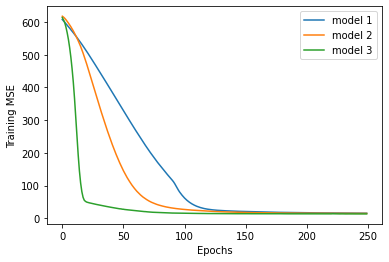

In [ ]:
model = {}

for i in range(1,4):

  ## compile the model
  model[i] = build(layers[i])

  ## train the model
  res = model[i].fit(x_train, y_train, epochs=250, batch_size=12, verbose=0)

  ## evaluate the model
  plt.figure(1)
  plt.plot(res.history['mse'],label='model '+str(i))
  print("Model",i,"   Training MSE : ", model[i].evaluate(x_train, y_train,verbose=0)[0])

plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
plt.show()

**Observations**


*  Model 3 is the best model, learns much quicker than other two models
*  As the number of epochs increase all the model fit well to the training data
*  After cetain value of epochs all models give same MSE





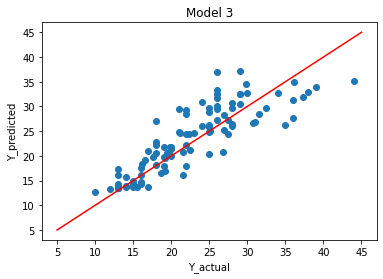

Model 3
Training MSE :  13.43610668182373
Testing MSE:  14.760444641113281


In [ ]:
### Best model is 4*5*10*5*1

xr = np.linspace(5,45,41)

### Visualizing actual data and predicted data with respect to x = y line 

## predict outputs
y_pred = model[3].predict(x_test)

## visualize predictions with respect to actual values
plt.scatter(y_test,y_pred)
plt.plot(xr,xr,'r')
plt.title('Model 3')
plt.xlabel('Y_actual')
plt.ylabel('Y_predicted')
plt.show()


print("Model",3)
print("Training MSE : ", model[3].evaluate(x_train, y_train,verbose=0)[0])
print("Testing MSE: ", model[3].evaluate(x_test, y_test,verbose=0)[0])

# **Question 2**

In [ ]:
##### Concate the training dataset and validation dataset #####
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

##### Split data into K = 10 blocks ######
kfold_index = KFold(n_splits=10, shuffle=True)

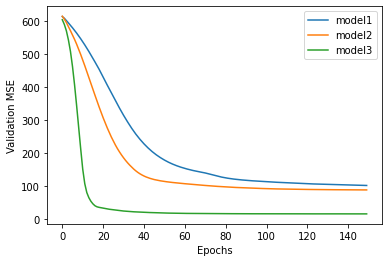

In [ ]:
np.random.seed(1)
## Iterate over all models
for i in range(1,4):
  MSE = np.zeros(150)

  ## K fold cross validation
  for train, test in kfold_index.split(x,y):
    
    ##initialize model for each fold
    m = build(layers[i])

    ## store the mSE
    MSE += m.fit(x[train],y[train], epochs=150, batch_size=10, validation_data=(x[test], y[test]), verbose=0).history['val_mse']
  
  ## take the average
  MSE/=10
  plt.plot(MSE,label='model'+str(i))

plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend(loc='best')
plt.show()

**Observations**

* Here we can clearly see that model 3 is the best model since it gives minimum mse, even for k fold cross - validation.

* Also we can see model-2 and model-1 which were giving same MSE as model-3 after some epochs, are now not able to produce same accuracy, this happens because
  * During 10 fold validation - Validation MSE is **very high (i.e. 600 here), for atleast one of the iteration** hence average MSE goes up
  * This happens when **models are not stable, because of weak tuning of hyper parameters**

* Cross Validation is very useful in optimizaing the hyper parameters (here nodes and layers) for choosing the right model architecture also.

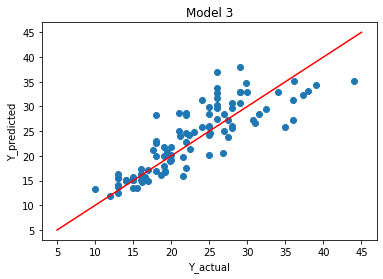

Model 3
Testing MSE:  15.16196060180664


In [ ]:
### Predicting the data by Best model and showing the error

### Best model is 4*5*10*5*1

xr = np.linspace(5,45,41)

### Visualizing actual data and predicted data with respect to x = y line 

m = build(layers[3])
m.fit(x_train,y_train,16,200,0)
y_pred = m.predict(x_test)
plt.scatter(y_test,y_pred)
plt.plot(xr,xr,'r')
plt.title('Model 3')
plt.xlabel('Y_actual')
plt.ylabel('Y_predicted')
plt.show()


print("Model",3)
print("Testing MSE: ", m.evaluate(x_test, y_test,verbose=0)[0])

# **Question 3**

Model 1



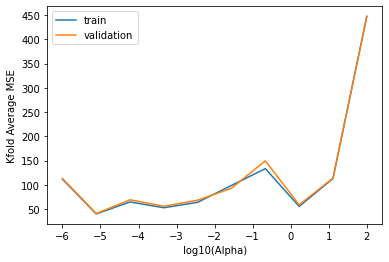

Model 2



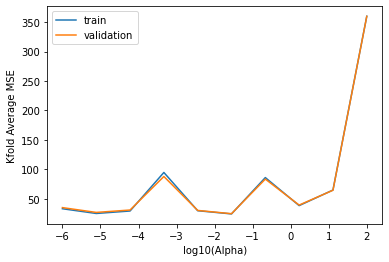

Model 3



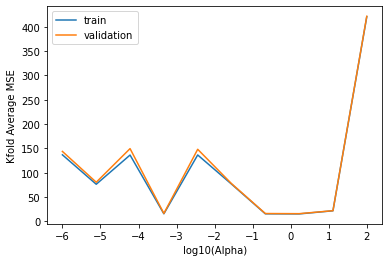

In [ ]:
alpha_range = np.logspace(-6,2,10)
x_alpha_range = np.linspace(-6,2,10)
epoch = 200
best_alpha = {}

######################################################
print("Model 1\n")
builder = lambda alpha : build(layers[1],alpha=alpha)
estimator = KerasRegressor(builder, epochs=epoch, verbose=0)
scorer = make_scorer(mse_fn)

## Use the inbuilt validation_curve function to plot the k-fold error vs alpha 
train_mse_kfold, validation_mse_kfold = validation_curve(estimator, x, y, 'alpha', alpha_range, cv=kfold_index, scoring=scorer, verbose=0)
train_mse_avg, validation_mse_avg = np.mean(train_mse_kfold, 1), np.mean(validation_mse_kfold, 1) 

best_alpha[1] = alpha_range[np.argmin(validation_mse_avg)]

plt.plot(x_alpha_range,train_mse_avg,label='train')
plt.plot(x_alpha_range,validation_mse_avg,label='validation')
plt.xlabel('log10(Alpha)')
plt.ylabel('Kfold Average MSE')
plt.legend(loc='best')
plt.show()

########################################################3
print("Model 2\n")
builder = lambda alpha : build(layers[2],alpha=alpha)
estimator = KerasRegressor(builder, epochs=epoch, verbose=0)
scorer = make_scorer(mse_fn)

train_mse_kfold, validation_mse_kfold = validation_curve(estimator, x, y, 'alpha', alpha_range, cv=kfold_index, scoring=scorer, verbose=0)
train_mse_avg, validation_mse_avg = np.mean(train_mse_kfold, 1), np.mean(validation_mse_kfold, 1) 
best_alpha[2] = alpha_range[np.argmin(validation_mse_avg)]


plt.plot(x_alpha_range,train_mse_avg,label='train')
plt.plot(x_alpha_range,validation_mse_avg,label='validation')
plt.xlabel('log10(Alpha)')
plt.ylabel('Kfold Average MSE')
plt.legend(loc='best')
plt.show()

######################################################3
print("Model 3\n")
builder = lambda alpha : build(layers[3],alpha=alpha)
estimator = KerasRegressor(builder, epochs=epoch, verbose=0)
scorer = make_scorer(mse_fn)

train_mse_kfold, validation_mse_kfold = validation_curve(estimator, x, y, 'alpha', alpha_range, cv=kfold_index, scoring=scorer, verbose=0)
train_mse_avg, validation_mse_avg = np.mean(train_mse_kfold, 1), np.mean(validation_mse_kfold, 1) 
best_alpha[3] = alpha_range[np.argmin(validation_mse_avg)]

plt.plot(x_alpha_range,train_mse_avg,label='train')
plt.plot(x_alpha_range,validation_mse_avg,label='validation')
plt.xlabel('log10(Alpha)')
plt.ylabel('Kfold Average MSE')
plt.legend(loc='best')
plt.show()

**Observation**

* Here On the right side of the graph, value of regularization parameter is very high, hence the data is underfitting, resulting in to very high mse

* On the contrast if we go to left most part of the graph mse is again increasing, which indicated overfitting for very small alpha(Note. We have not taken very small values of alpha considering computational limits)

* Best value of alpha varies from model to model

In [ ]:
for x in best_alpha:
  print("Model {} : Best alpha = {}".format(x,round(best_alpha[x],7)))

Model 1 : Best alpha = 7.7e-06
Model 2 : Best alpha = 0.0278256
Model 3 : Best alpha = 1.6681005


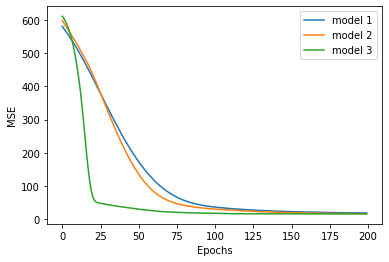

In [ ]:
##   Compare all the models
model = {}

for i in range(1,4):
  model[i] = build(layers[i],alpha=best_alpha[i])
  res = model[i].fit(x_train, y_train, epochs=200, batch_size=12, verbose=0)
  plt.figure(1)
  plt.plot(res.history['mse'],label='model '+str(i))

plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

* Here Model 3 is clearly fitting well and quicker then the other two models
* Lets visualize the predictions and understand how

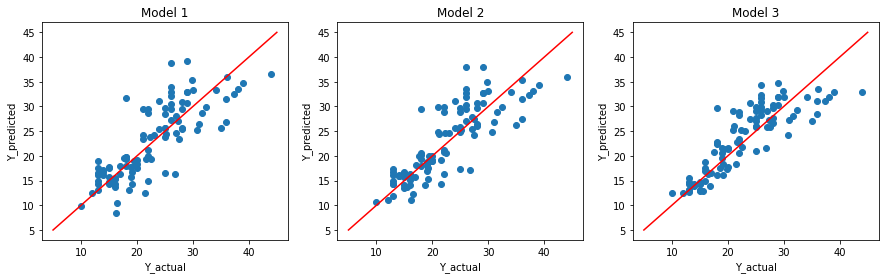

In [ ]:
plt.figure(figsize=(15,4))
xr = np.linspace(5,45,41)
#fig, a =  plt.subplots(1,3)

for i in range(1,4):
  y_pred = model[i].predict(x_test)
  ax = plt.subplot(1,3,i)
  ax.scatter(y_test,y_pred)
  ax.plot(xr,xr,'r')
  ax.set_title('Model {}'.format(i))
  plt.xlabel('Y_actual')
  plt.ylabel('Y_predicted')
plt.show()

**Obervations**

* Here we are plotting **y_predicted** vs **y_actual** hence we can see how close the predictions are just by seeing the distance of the point from line x = y

* We can see that for model 1 point are very far from x = y line, very close to underfitting

* We can see in model 3, the points are getting close to the x = y, line hence model gets fitted well by increasing number of layers, with the right value of **regularization parameter : alpha**, 

* Hence **by optimizing the regularization parameter with respect to given architecture we can increase the complexity**, and fit data even better, without losing the generality of the network. 

In [ ]:
## Lets Compare the Model 3 with its unregularized version with respect to complexity
## We will predict on the test data and plot the error

RANGE = np.linspace(10,510,21)
mse1 = []
mse2 = []

layer = [4] + [15]*5 + [1]
m1 = build(layer)
m2 = build(layer,alpha= best_alpha[3])

for epoch in  RANGE:  
  epoch = tf.cast(epoch,tf.int64)
  m1.fit(x_train, y_train, epochs=epoch, batch_size=12, verbose=0)
  m2.fit(x_train, y_train, epochs=epoch, batch_size=12, verbose=0)
  mse1.append(m1.evaluate(x_test,y_test,verbose=0)[0])
  mse2.append(m2.evaluate(x_test,y_test,verbose=0)[0])

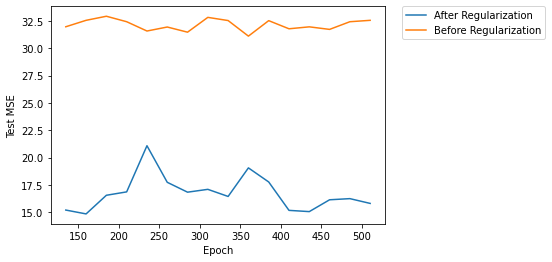

In [ ]:
## closer look near the lowest mse
plt.plot(RANGE[5:],mse1[5:],label='After Regularization')
plt.plot(RANGE[5:],mse2[5:],label='Before Regularization')
plt.xlabel('Epoch')
plt.ylabel('Test MSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

This results show the importance of regularization in stabilizing the neural network

# **Question 4**

## Overfitting

Training Prediction


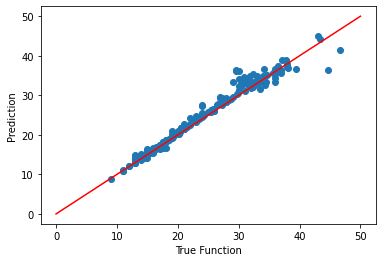

Testing Prediction


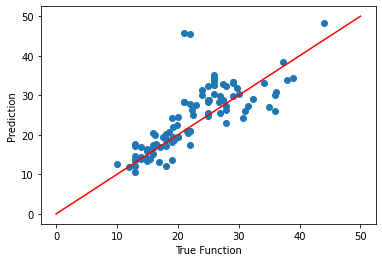

In [ ]:
### Neural Network Architecture : 4*64*64*64*64*64*1
over = build([4]+[64]*5+[1])
over.fit(x_train, y_train, epochs=1000, batch_size=12, verbose=0)

predict_y_train = over.predict(x_train)
predict_y_test = over.predict(x_test)

print("Training Prediction")
x = np.linspace(0,50,50)
y = x
plt.plot(x,y,'r')
plt.scatter(y_train,predict_y_train)
plt.xlabel('True Function')
plt.ylabel('Prediction')
plt.show()

print("Testing Prediction")
plt.plot(x,y,'r')
plt.scatter(y_test,predict_y_test)
plt.xlabel('True Function')
plt.ylabel('Prediction')
plt.show()

**Observation**

* Here For the training data we can observe that predictions and actual values are very close to each other, and almost lie on x = y line

* But since the model is overfitting, testing data is not getting predicted very well, and hence visualizaion with actual data is far from the x = y line

* In the below cell we have shown why this is happening

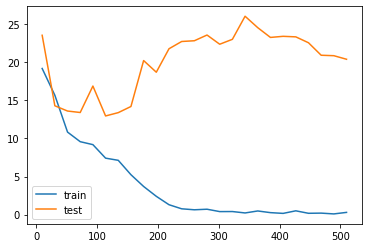

In [ ]:
over = build([4]+[64]*5+[1])
RANGE = np.linspace(10,510,25)
train = []
test = []
for epoch in RANGE:
  epoch = tf.cast(epoch,tf.int64)
  over.fit(x_train, y_train, epochs=epoch, batch_size=12, verbose=0)
  train.append(over.evaluate(x_train,y_train,verbose=0)[0])
  test.append(over.evaluate(x_test,y_test,verbose=0)[0])

plt.plot(RANGE,train,label='train')
plt.plot(RANGE,test,label='test')
plt.legend(loc='best')
plt.show()

**Observation**

* We can clearly see that model is overfitting since the gap between training and test mse is significatly increasing as the number of epochs increase 

Training Prediction


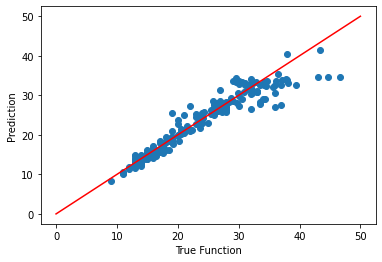

Testing Prediction


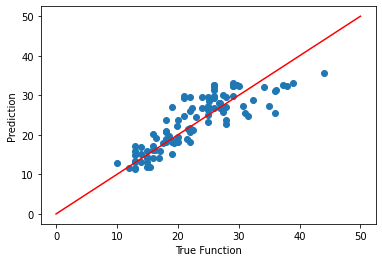

In [ ]:
### Another overfitting model : 4*1024*1
over = build([4]+[1024]*3+[1])
over.fit(x_train, y_train, epochs=500, batch_size=12, verbose=0)

predict_y_train = over.predict(x_train)
predict_y_test = over.predict(x_test)

print("Training Prediction")
x = np.linspace(0,50,50)
y = x
plt.plot(x,y,'r')
plt.scatter(y_train,predict_y_train)
plt.xlabel('True Function')
plt.ylabel('Prediction')
plt.show()

print("Testing Prediction")
plt.plot(x,y,'r')
plt.scatter(y_test,predict_y_test)
plt.xlabel('True Function')
plt.ylabel('Prediction')
plt.show()

* We can observe from above two examples that as the number of nodes increase in each layer, or as the number of layers increase, complexity of the network increases, hence the model overfits the training data, resulting into bad error for the test data 

* To avoid there vary the hyper parameters such as nodes, layers, regularization parameter(alpha), and choose the just right fit model 

## Underfitting

Training Prediction


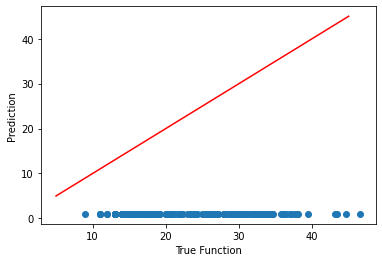

Testing Prediction


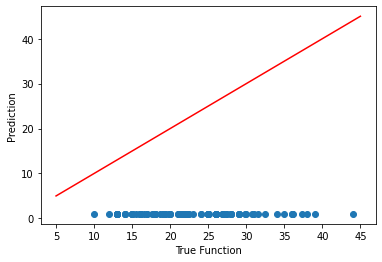

In [ ]:
### Neural Network Architecture : 4*1
under = build([4,1,1],['tanh','tanh'])
under.fit(x_train, y_train, epochs=500, batch_size=12, verbose=0)

predict_y_train = under.predict(x_train)
predict_y_test = under.predict(x_test)

print("Training Prediction")
x = np.linspace(5,45,41)
y = x
plt.plot(x,y,'r')
plt.scatter(y_train,predict_y_train)
plt.xlabel('True Function')
plt.ylabel('Prediction')
plt.show()

print("Testing Prediction")
plt.plot(x,y,'r')
plt.scatter(y_test,predict_y_test)
plt.xlabel('True Function')
plt.ylabel('Prediction')
plt.show()

**Observation**

* Here the training data itself is not fitting well by the model

* Here the visualized points are far from x = y line in both training and testing set 

* Hence the model is underfitting

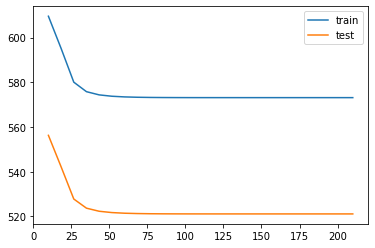

In [ ]:
under = build([4,1,1],['tanh','tanh'])
RANGE = np.linspace(10,210,25)
train = []
test = []
for epoch in RANGE:
  epoch = tf.cast(epoch,tf.int64)
  under.fit(x_train, y_train, epochs=epoch, batch_size=12, verbose=0)
  train.append(under.evaluate(x_train,y_train,verbose=0)[0])
  test.append(under.evaluate(x_test,y_test,verbose=0)[0])

plt.plot(RANGE,train,label='train')
plt.plot(RANGE,test,label='test')
plt.legend(loc='best')
plt.show()

**Observation**

* We can clearly see that model is underfitting since the training mse itself is saturating at very high value 

* The reason is because the activation function only returns the value between -1 and 1 , but since the data is for regression problem model does not fit well and underfits

Training Prediction


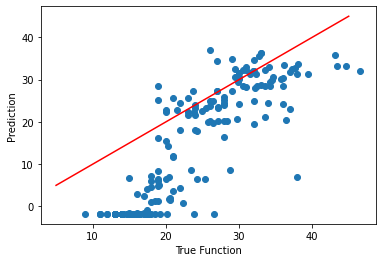

Testing Prediction


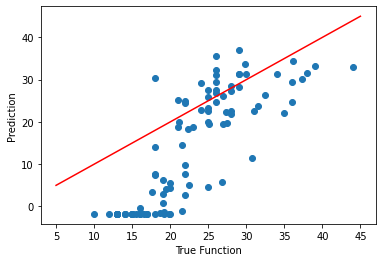

In [ ]:
### Another underfitting model
### Neural Network Architecture : 4*1
over = build([4,1],['selu'])
over.fit(x_train, y_train, epochs=500, batch_size=12, verbose=0)

predict_y_train = over.predict(x_train)
predict_y_test = over.predict(x_test)

print("Training Prediction")
x = np.linspace(5,45,41)
y = x
plt.plot(x,y,'r')
plt.scatter(y_train,predict_y_train)
plt.xlabel('True Function')
plt.ylabel('Prediction')
plt.show()

print("Testing Prediction")
plt.plot(x,y,'r')
plt.scatter(y_test,predict_y_test)
plt.xlabel('True Function')
plt.ylabel('Prediction')
plt.show()


* This model is better than the previous underfitting model since we chose the right activation Function

* But since the complexity of the model is very low we are still not getting the best fit

# **Conclusion**

=> To gain the optimized hyperparameters : Use cross validation over range of parameters

=> To avoid overfitting : Choose the better regularization parameter, Avoid unnecessary complexity

=> To avoid underfitting : Choose proper activation function, Increase the complexity
